In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing as pre

In [2]:
df = pd.read_csv("RRCA_baseflow.csv")

In [3]:
df.head()

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689


In [4]:
df['Segment_id'].unique()

array([144, 154, 176, 171, 152,  55, 118,  65,  64,  63,  40, 135,  53,
       123, 157, 147, 170, 136, 149,  60, 188, 194, 239, 256, 205,  59,
       148, 138,  62,  96, 178, 186, 159, 130,  97,  51, 145, 196, 146,
       189,  56,  98])

In [5]:
len(df['Segment_id'].unique())

42

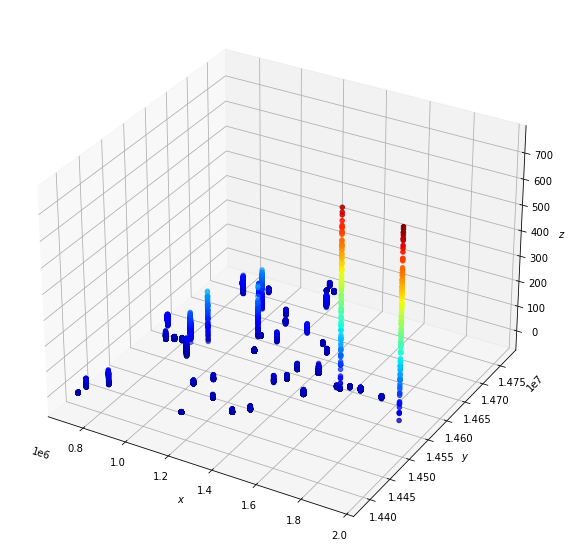

In [6]:
# Plot the dataset.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(df['x'],df['y'],df['Observed'],c=df['Observed'],cmap="jet")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

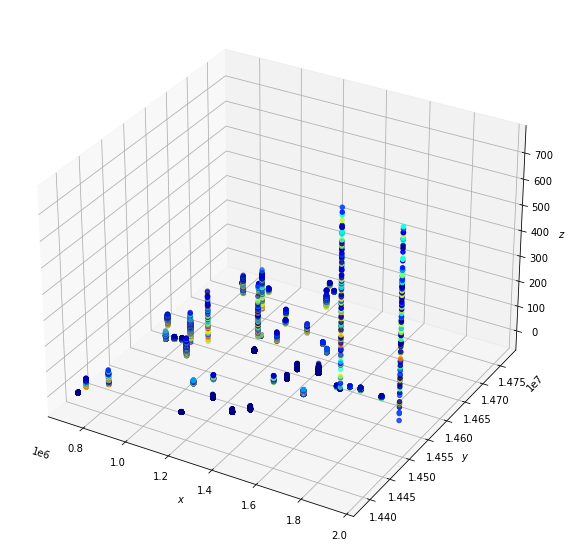

In [7]:
# Plot the dataset.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(df['x'],df['y'],df['Observed'],c=df['Evapotranspiration'],cmap="jet")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

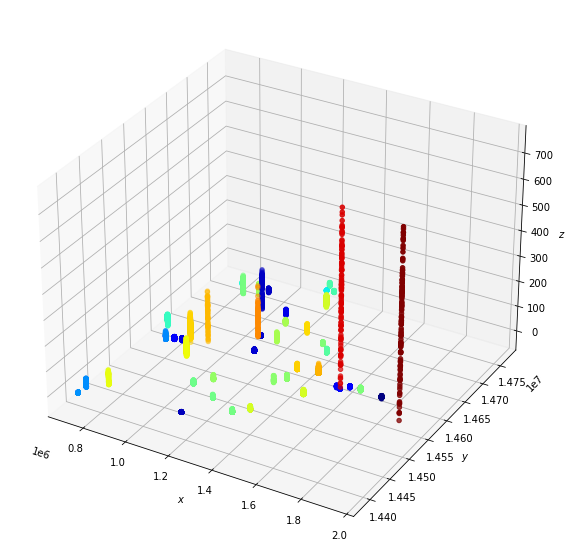

In [8]:
# Plot the dataset.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(df['x'],df['y'],df['Observed'],c=df['Segment_id'],cmap="jet")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

In [9]:
df256 = df[df['Segment_id']==256]

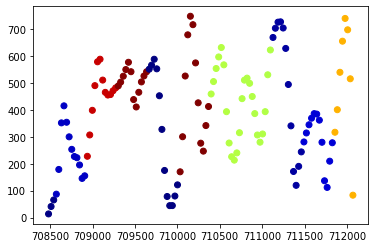

In [10]:
plt.scatter(df256['Date'],df256['Observed'], c=df256['Precipitation'], cmap='jet')

In [11]:
df256.iloc[55]

Date                  7.101530e+05
Segment_id            2.560000e+02
x                     1.941550e+06
y                     1.452432e+07
Evapotranspiration    4.600000e+00
Precipitation         3.550000e+01
Irrigation_pumping    0.000000e+00
Observed              7.478033e+02
Name: 6565, dtype: float64

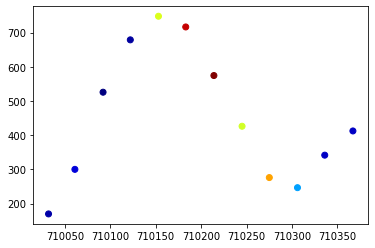

In [12]:
temp = df256[df256['Precipitation']==35.5] #or 18.78
plt.scatter(temp['Date'],temp['Observed'],c=(temp['Evapotranspiration']),cmap='jet')

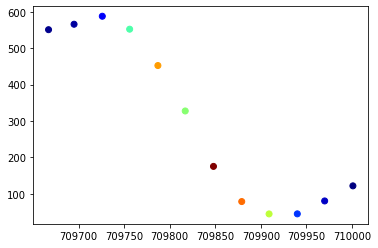

In [13]:
temp = df256[df256['Precipitation']==18.78]
plt.scatter(temp['Date'],temp['Observed'],c=(temp['Evapotranspiration']),cmap='jet')

In [14]:
df['Segment_id'].unique()

array([144, 154, 176, 171, 152,  55, 118,  65,  64,  63,  40, 135,  53,
       123, 157, 147, 170, 136, 149,  60, 188, 194, 239, 256, 205,  59,
       148, 138,  62,  96, 178, 186, 159, 130,  97,  51, 145, 196, 146,
       189,  56,  98])

In [15]:
def myplot(n):
    dfn = df[df['Segment_id']==n]
    plt.scatter(dfn['Date'],dfn['Observed'], c=dfn['Precipitation'], cmap='jet')
    plt.show()

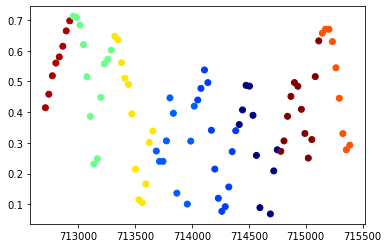

In [16]:
myplot(118)

In [17]:
df['intDiv'] = df['Date'] // 365
df['remainder'] = df['Date'] % 365

In [18]:
df

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,intDiv,remainder
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161,1947,77
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161,1947,108
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203,1947,136
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203,1947,167
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689,1947,197
...,...,...,...,...,...,...,...,...,...,...
15586,721810,98,721870,14387040,0.00,0.00,0.0,0.298500,1977,205
15587,721841,98,721870,14387040,0.00,0.00,0.0,0.211475,1977,236
15588,721871,98,721870,14387040,0.00,0.00,0.0,0.122951,1977,266
15589,721902,98,721870,14387040,0.00,0.00,0.0,0.120000,1977,297


In [19]:
# This function gives us the pieve-wise linear approximation.
def myPredict(ID, threshold):
    m1 = df[df['Segment_id']==ID]
    years = m1['intDiv'].unique()
    ydfs = [m1[m1['intDiv']==year] for year in years]
    
    def splitYear(df,th):
        n1 = df[df['remainder'] < th]
        n2 = df[df['remainder'] >= th]
        return [n1, n2]
    
    Ydfs = []
    for i in range(len(ydfs)):
        Ydfs += splitYear(ydfs[i], threshold)
        
    def learnLin(df):
        X = (df['Date']).to_numpy().reshape(-1,1)
        y = df['Observed']
        reg = LinearRegression().fit(X, y)
        return [reg.score(X,y), reg.coef_, reg.intercept_]
    
    mylist = []
    mycoefs = []
    myintercepts = []
    for thing in Ydfs:
        mylist += [learnLin(thing)[0]]
        mycoefs += [learnLin(thing)[1]]
        myintercepts += [learnLin(thing)[2]]
        
    #bestOne = np.argmin(mylist)
    plt.figure(figsize = (10,10))
    myfig = plt.scatter(m1['Date'], m1['Observed'])
    for ind in range(len(Ydfs)):
        plt.plot(Ydfs[ind]['Date'], mycoefs[ind]*Ydfs[ind]['Date']+myintercepts[ind], c='red')
    plt.show()
    fig = myfig.get_figure()
    fig.savefig("file.png")
    
    return sum(mylist)/len(mylist)

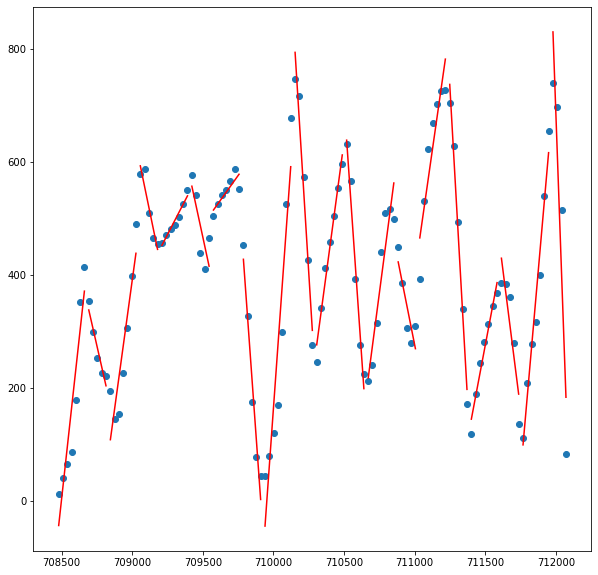

0.8836699025965338

In [20]:
myPredict(256,200)

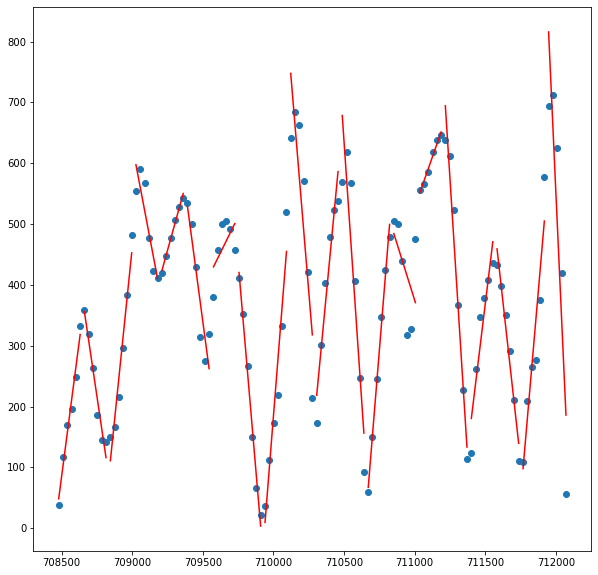

0.8556293193324256

In [21]:
myPredict(239,180)

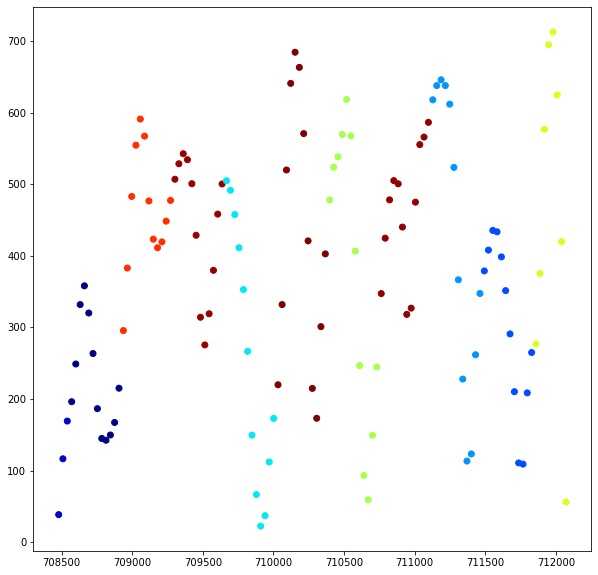

In [26]:
df239 = df[df['Segment_id']==239]
plt.figure(figsize = (10,10))
myfig = plt.scatter(df239['Date'],df239['Observed'], c=df239['Precipitation'], cmap='jet')
fig = myfig.get_figure()
fig.savefig("file.png")

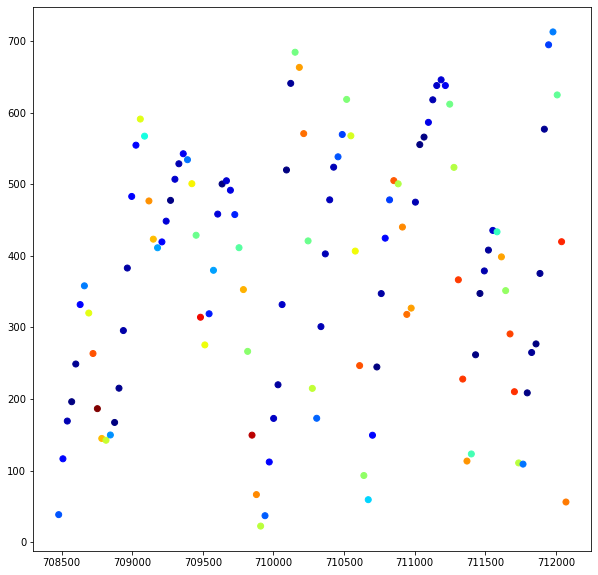

In [27]:
plt.figure(figsize = (10,10))
plt.scatter(df239['Date'],df239['Observed'], c=df239['Evapotranspiration'], cmap='jet')
fig = myfig.get_figure()
fig.savefig("file.png")

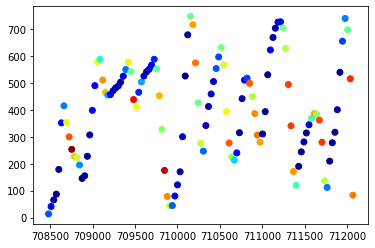

In [28]:
myfig = plt.scatter(df256['Date'],df256['Observed'], c=df256['Evapotranspiration'], cmap='jet')
fig = myfig.get_figure()
fig.savefig("file.png")

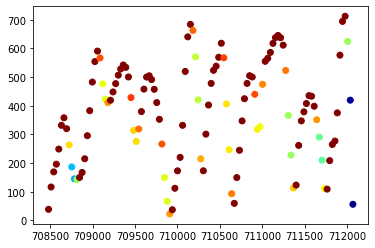

In [25]:
plt.scatter(df239['Date'],df239['Observed'], c=df239['Irrigation_pumping'], cmap='jet')